# Exercício - Kognita - Processo seletivo - Gabriel Negrão

## Importando a base de dados do exercício

Abaixo eu importo a base diretamente do meu repositório no Github:

In [78]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x) # retirando a notação científica

# Carregando os dados CSV em um DataFrame
base = pd.read_csv('https://raw.githubusercontent.com/GabrielNatthan/Exercicio_Kognita/main/dataset_2021-5-26-10-14.csv',
                    sep = '\t', encoding = 'utf-8')

# Analisando o DataFrame
display(base)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.00,18.24,0.00,0.00,242100.70,0,0.00,0,0.00,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.67,6,2019,0
1,1,16.05,7.50,224132.85,0.00,4960846.21,0,0.00,0,0.00,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.49,10,2018,0
2,0,13.25,3.90,513043.83,0.00,158631.93,1,1800.00,0,0.00,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.62,4,2018,0
3,0,136.93,10.14,23273.64,0.00,669644.16,0,0.00,0,0.00,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.81,4,2017,1
4,0,140.33,17.65,0.00,0.00,2010.56,0,0.00,0,0.00,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.51,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.68,16.58,10470.62,0.00,540673.32,0,0.00,0,0.00,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.16,1,2019,1
117269,0,41.89,16.65,3349.88,0.00,3373.15,0,0.00,0,0.00,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.83,4,2018,1
117270,0,132.53,18.19,893.23,0.00,3362.16,0,0.00,0,0.00,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.32,1,2017,1
117271,0,26.93,16.34,43969.13,0.00,13889.90,2,622.55,0,0.00,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.27,11,2019,1


## Análise Exploratória e Tratamento de dados

O objetivo do seguinte exercício é desenvolver um modelo que possa prever a probabilidade de default de um cliente baseando-se no seu histórico de informações. No contexo do negócio da X-Health, um modelo como este poderia ser de grande valia, já que utilizando tal ferramenta a mepresa poderia poderia tomar melhores decisões no que diz respeito a sua concessão de crédito, sendo mais cautelosa com um cliente cuja probabilidade de default prevista seja mais alta. 

Antes de elencarmos modelos possíveis para esta tarefa, estimá-los e ver qual que performa melhor, é necessário que façamos primeiramente uma análise exploratória dos dados. 

Começamos por conhecer a estrutura dos dados, verificando a necessidade de algum tratamento, identificar seus valores faltantes, transformar as variáveis caso necessário

### Tratamento de dados preliminar

Antes de começar a analisar nossos dados e tentar encontrar relações entre eles, vamos fazer uma averiguação nos dados para ver se eles necessitam de tratamento geral:

Primeiro, trocamos os elementos com "missing" por "NaN", para que assim possamos identificar mais claramente os valores faltantes:

In [79]:
import numpy as np

# Trocando os valores com "missing" para "NaN"
base.replace({'missing': np.nan}, inplace=True)

Após isso, verificamos se há algum dado duplicado. Se tiver, retiramos

In [80]:
# Conferindo se há alguma linha duplicada
base[base.duplicated()]

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default


Não há linhas duplicadas.

Verificamos se cada variável está de acordo com o seu respectivo tipo de dado e vemos também quantos dados faltantes temos:

In [81]:
# Vendo a estrutura do dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

Todas as variáveis parecem estar de acordo com o seu respectivo tipo. Notamos que a base possui uma certa quantidade de valores faltantes, que se encontram todos nas variáveis com conteúdo categórico. 

Ao contrário das variáveis numéricas em que podemos substituir o valor faltante pela média ou mediana, neste caso não podemos fazer isso e o que nos restaria seria retirar as linhas com os valores ausentes. 

Porém, como o nosso objetivo final é a modelagem, as variáveis categóricas precisam estar em forma apropriada para que o modelo consiga extrair a suas informações. Portanto, me parece conveniente analisar as variáveis categóricas e realizar suas transformações antes da retirada de suas respectivas linhas com valores ausentes.

### Transformação e Análise das variáveis categóricas/Tratamento dos missing values

Vamos ver primeiro a coluna de tipo de sociedade:

In [82]:
# Calcula a quantidade de indivíduos que tiveram default para cada tipo de sociedade 
cont_tipo = base.groupby(['tipo_sociedade', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_tipo['Total'] = cont_tipo[0] + cont_tipo[1]

# Organiza em ordem decrescente de acordo com o total de ocorrencias
cont_tipo = cont_tipo.sort_values(by='Total', ascending=False)
cont_tipo

default,0,1,Total
tipo_sociedade,,,
sociedade empresaria limitada,51303,8717,60020
empresario (individual),21370,5685,27055
empresa individual respons limitada empresaria,16287,2914,19201
empresario-mei(microempreendedor individual),5253,1633,6886
sociedade anonima fechada,2116,366,2482
cooperativa,480,87,567
sociedade simples limitada,44,77,121
outras formas de associacao,102,4,106
sociedade anonima aberta,79,1,80


O tipo de sociedade pode se relevante para influenciar a probabilidade de inadimplência. Porém, se transformarmos todas essas categorias em dummies e usarmos elas no modelo, teríamos várias delas com pouquíssimas ocorrências, tendo assim variáveis pouco relevantes para a modelagem. Sendo assim, optei por agregar todas as categorias abaixo de "sociedade anonima fechada" como mostra na tabela acima, colocando todas em uma única categoria chamada "outros tipos de sociedade". Vejo que os tipos de sociedade mais importantes sejam as 5 primeiras que aparecem na tabela.

In [83]:
# Categorias para serem agregadas (com ocorrências menores do que 10,000)
outros_tipos = cont_tipo[cont_tipo['Total'] <= 2000].index

# Agregando as categorias
base['tipo_sociedade'] = base['tipo_sociedade'].replace(outros_tipos, 'outros tipos de sociedade')

# Recalculando a quantidade de indivíduos que tiveram default para cada tipo de sociedade 
cont_tipo = base.groupby(['tipo_sociedade', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_tipo['Total'] = cont_tipo[0] + cont_tipo[1]

Podemos ver em um gráfico de barras se algum tipo de sociedade se sobressai em relação ao outro quanto a procentagem de inadimplência:

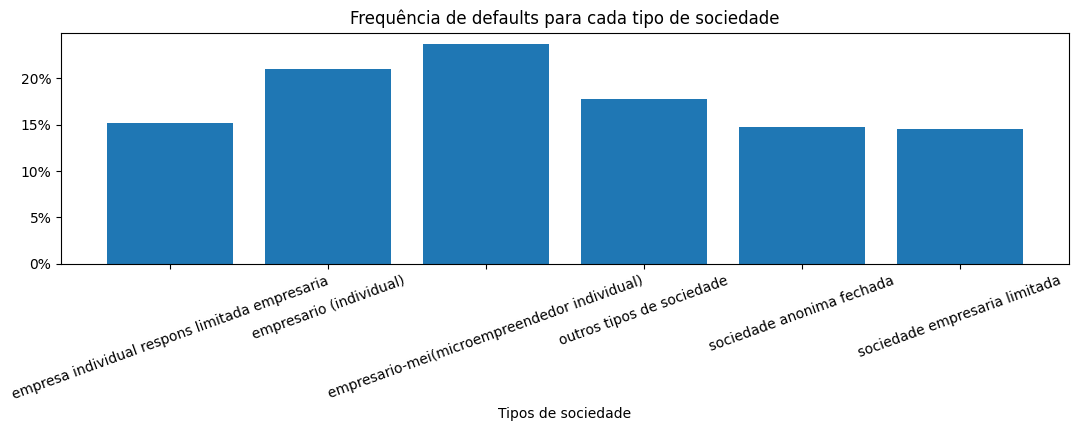

In [84]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Calculando a frequencia relativa de defalts para cada tipo
cont_tipo['freq'] = (cont_tipo[1] / cont_tipo['Total'])

# Cria o gráfico de barras
plt.figure(figsize=(13, 3))
plt.bar(cont_tipo.index, cont_tipo['freq'])
plt.xlabel('Tipos de sociedade')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.xticks(rotation=20)
plt.title('Frequência de defaults para cada tipo de sociedade')
plt.show()

Negócios com empresários individuais tendem a ser mais arriscados do que empresas com sociedade limitada, e isso se reflete um pouco na porcentagem de defaults maior para os empresários

Agora com a nossa variável de tipo de sociedade mais enxuta, podemos decompô-la em dummies para a modelagem. É necessário neste processo prestar atenção em um detalhe: como temos 4 categorias, devemos colocar na nossa base que servirá como entrada para o modelo apenas 3 dummies. Se adicionassemos as 4 criadas, teríamos problemas com multicolinearidade.

In [85]:
# Selecionando a coluna categórica tipo_sociedade
base_tipo_sociedade = pd.DataFrame(base['tipo_sociedade'], columns=['tipo_sociedade'])

# Separando as categorias em colunas com variáveis binárias 
base_tipo_sociedade = pd.get_dummies(base_tipo_sociedade, columns=['tipo_sociedade'], dtype = 'int')

# Adicionando na base as dummies, excluindo a de outros tipos de sociedade
base_model = base.merge(base_tipo_sociedade[['tipo_sociedade_empresa individual respons limitada empresaria', 
                                                                                    'tipo_sociedade_empresario (individual)', 
                                                                                    'tipo_sociedade_sociedade empresaria limitada',
                                                                                    'tipo_sociedade_empresario-mei(microempreendedor individual)',
                                                                                    'tipo_sociedade_sociedade anonima fechada']], left_index=True, right_index=True)

Vamos ver agora a coluna de opcão tributária:

In [86]:
# Calcula a quantidade de indivíduos que tiveram default para cada opcao
cont_opcao = base.groupby(['opcao_tributaria', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_opcao['Total'] = cont_opcao[0] + cont_opcao[1]

# Organiza em ordem decrescente de acordo com o total de ocorrencias
cont_opcao = cont_opcao.sort_values(by='Total', ascending=False)
cont_opcao

default,0,1,Total
opcao_tributaria,,,
simples nacional,70842,17151,87993
lucro real,7188,619,7807
lucro presumido,2713,44,2757
isento,385,6,391


A opção tributária também pode ser relevante para prever a inadimplência. Da mesma forma que antes, vamos agregar todas as opções tributárias abaixo de "simples nacional", para assim não termos variáveis com pouca informação

In [87]:
# Categorias para serem agregadas (com ocorrências menores do que 10,000)
outras_opcoes = cont_opcao[cont_opcao['Total'] <= 10000].index

# Agregando as categorias
base['opcao_tributaria'] = base['opcao_tributaria'].replace(outras_opcoes, 'outras opções tributárias')

# Recalculando a quantidade de indivíduos que tiveram default para cada opcao
cont_opcao = base.groupby(['opcao_tributaria', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_opcao['Total'] = cont_opcao[0] + cont_opcao[1]

Vemos no gráfico se existe alguma tendência de ter mais defaults para aqueles que optaram pelo Simples Nacional:

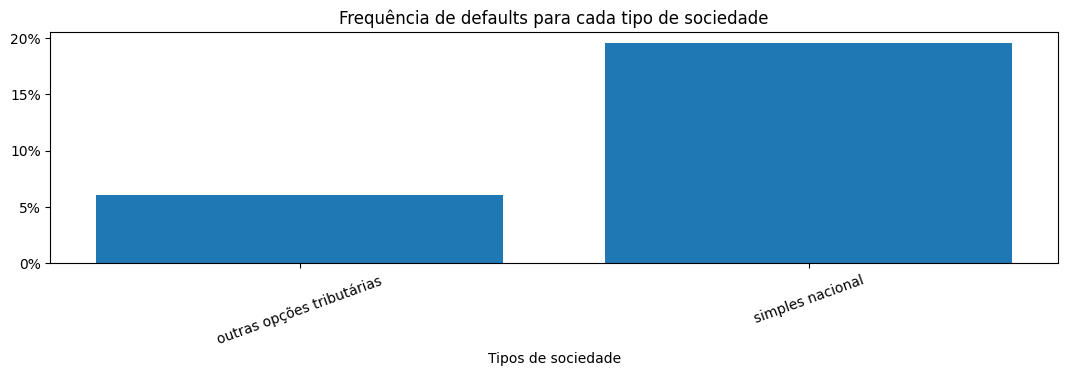

In [88]:
# Calculando a frequencia relativa de defalts para cada opção
cont_opcao['freq'] = (cont_opcao[1] / cont_opcao['Total'])

# Cria o gráfico de barras
plt.figure(figsize=(13, 3))
plt.bar(cont_opcao.index, cont_opcao['freq'])
plt.xlabel('Tipos de sociedade')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.xticks(rotation=20)
plt.title('Frequência de defaults para cada tipo de sociedade')
plt.show()

Podemos perceber que, mesmo agregando as opções tributárias, a frequência de defaults é bem mais elevada para os clientes usuários do Simples. É comum que negócios que adotam o Simples sejam mais instáveis.

Adicionando a dummy de Simples Nacional na base

In [89]:
# Selecionando a coluna categórica opcao_tributaria
base_opcao_tributaria = pd.DataFrame(base['opcao_tributaria'], columns=['opcao_tributaria'])

# Separando as categorias em colunas com variáveis binárias 
base_opcao_tributaria = pd.get_dummies(base_opcao_tributaria, columns=['opcao_tributaria'], dtype = 'int')

# Adicionando na base a dummy, excluindo a de outras opções
base_model = base_model.merge(base_opcao_tributaria['opcao_tributaria_simples nacional'], left_index=True, right_index=True)

Para a coluna de atividade principal, temos:

In [90]:
# Calcula a quantidade de indivíduos que tiveram default para cada atividade
cont_ativ = base.groupby(['atividade_principal', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_ativ['Total'] = cont_ativ[0] + cont_ativ[1]

# Organiza em ordem decrescente de acordo com o total de ocorrencias
cont_ativ = cont_ativ.sort_values(by='Total', ascending=False)
cont_ativ

default,0,1,Total
atividade_principal,,,
com de equipamentos de informatica,18095,4534,22629
com de telefones e equip p/ comunicacoes,7190,2661,9851
papelaria,8130,945,9075
com de moveis e estofados,7137,1089,8226
com de eletrodomesticos,7014,1142,8156
...,...,...,...
sindicato de empregados,2,0,2
locacao de roupas e outros art do vestuario,2,0,2
promocao de eventos,2,0,2


In [91]:
# Categorias para serem agregadas (com ocorrências menores do que 10,000)
outras_ativ = cont_ativ[cont_ativ['Total'] <= 10000].index

# Agregando as categorias
base['atividade_principal'] = base['atividade_principal'].replace(outras_ativ, 'outras atividades principais')

# Recalculando a quantidade de indivíduos que tiveram default para cada opcao
cont_ativ = base.groupby(['atividade_principal', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_ativ['Total'] = cont_ativ[0] + cont_ativ[1]

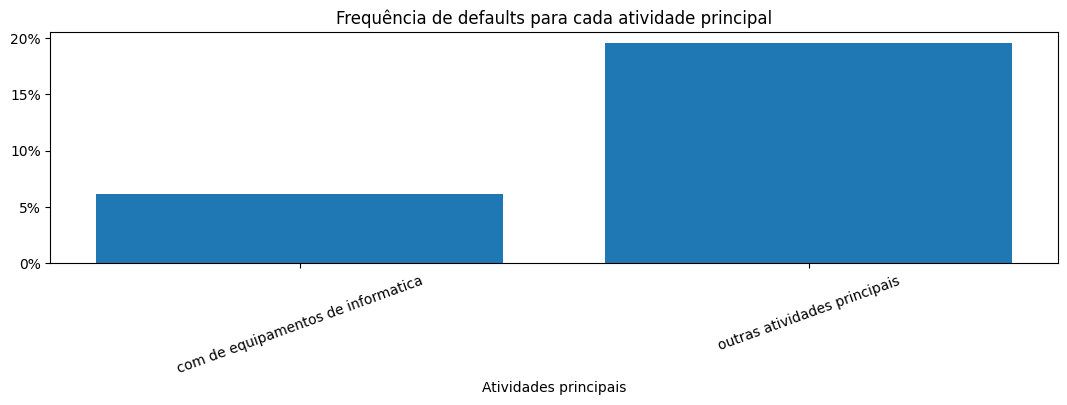

In [92]:
# Calculando a frequencia relativa de defalts para cada opção
cont_ativ['freq'] = (cont_ativ[1] / cont_ativ['Total'])

# Cria o gráfico de barras
plt.figure(figsize=(13, 3))
plt.bar(cont_ativ.index, cont_opcao['freq'])
plt.xlabel('Atividades principais')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
plt.xticks(rotation=20)
plt.title('Frequência de defaults para cada atividade principal')
plt.show()

A frequência de inadimplência para companhias de equipamento de informática é consideravelmente menor do que as outras atividades principais. Porém, podemos elencar alguns argumentos para a retira dessa coluna na base. A priori, é dfícil encontrarmos alguma relação no tipo de atividade que o cliente está engajado na sua condição de bom pagador. Além disso, são mais de 200 categorias que seriam necessárias agregar e não vejo como seria ´possível agregá-las de uma forma eficiente.  

Pensando nisto, concluo que seria melhor retirar esta coluna da base. Assim, pudemos poupar algumas linhas de ser excluídas.

In [93]:
# Retirando a coluna atividade_principal da base
base_model = base_model.drop('atividade_principal', axis=1)

OLhando agora a coluna de forma de pagamento, temos:

In [94]:
# Calcula a quantidade de indivíduos que tiveram default para cada forma
cont_forma = base.groupby(['forma_pagamento', 'default']).size().unstack(fill_value=0)

# Calcula o número total de casos 
cont_forma['Total'] = cont_forma[0] + cont_forma[1]

# Organiza em ordem decrescente de acordo com o total de ocorrencias
cont_forma = cont_forma.sort_values(by='Total', ascending=False)
cont_forma

default,0,1,Total
forma_pagamento,,,
30/60/90,23451,5964,29415
30/60/90/120,5607,1657,7264
28/42/56,5810,673,6483
28 dias,3243,132,3375
30 dias,2671,61,2732
...,...,...,...
80/110/140/170/200/230,2,0,2
110 dias,2,0,2
65/80/95/110/125/140/155,1,0,1


Da mesma forma que antes, poderíamos agregar as categorias para não criar muitas dummies que sejam irrelevantes. Porém, para este caso podemos pensar em uma alternativa diferente. Dado que quanto maior o prazo médio de pagamento, a operação pode se tornar mais arriscada, aumentando assim a probabilidade de defaults. Portanto, o que é possível fazer é tratar essa clouna de forma que todas as formas de pagamento reflitam o seu respecivo prazo médio de pagamento.

Pra transformar todas as categorias em seu respectivo prazo médio, vamos deixar todas as formas em um único formato, que é o número de dias entre as barras. Calculamos o prazo médio fazendo simplesmente a média dos dias. Portanto, caso um cliente tenha decidido a sua forma de pagamento em 30/60/90, o prazo médio será 60 dias.

Porém, temos que antes fazer transformações particulares em algumas formas de pagamento para assim deixar tudo padronizado:

In [95]:
# Separando a coluna em um dataframe separado
base_forma = base['forma_pagamento']
base_forma = pd.DataFrame(base_forma, columns=['forma_pagamento'])

# Retirando da base o indivíduo com "sem pagamento"
base_forma['forma_pagamento'] = base_forma[base_forma['forma_pagamento'] != 'sem pagamento']

# Renomeando a categoria "12 vezes, 1a, 30dd"
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('12 vezes, 1a, 30dd', '30/60/90/120/150/180/210/240/270/300/330/360')

# Renomeando a categoria "10x,1a. 30dd"
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('10x,1a. 30dd', '30/60/90/120/150/180/210/240/270/300')

# Renomeando a categoria 24x
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('24x', '30/60/90/120/150/180/210/240/270/300/330/360/390/420/450/480/510/540/570/600/630/660/690/720')

# Renomeando a categoria "90+10x - 30/30"
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('90+10x - 30/30', '90/120/150/180/210/240/270/300/330/360')

# Renomeando a categoria "boleto a vista"
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('boleto a vista', '0')

# Renomeando a categoria '36x (0+36)'
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace('36x (0+36)', '30/60/90/120/150/180/210/240/270/300/330/360/390/420/450/480/510/540/570/600/630/660/690/720/750/780/810/840/870/900/930/960/990/1020/1050/1080')

# Retirando tudo que é letra
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace(r'[a-zA-Z]', '', regex=True)

# Retirando todos os espaços vazios
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace(' ', '')

# Substituindo as vírgulas por barras
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].str.replace(',', '/')

Por fim, para sabermos o prazo médio de pagamento de cada observação que possui uma compra parcelada, criamos uma função que calcula exatamente isso, levando em consideração que os números estão separados por barras:

In [96]:
# definindo uma função para calcular o prazo médio de pagamento

def calcular_media(valor):
    # Converte o valor para string para garantir compatibilidade com a operação de verificação
    valor_str = str(valor)
    # Verifica se o valor convertido contém uma barra
    if '/' in valor_str:
        # Divide o valor em uma lista de números, converte para float, calcula a média e retorna
        numeros = valor_str.split('/')
        media = sum(map(float, numeros)) / len(numeros)
        return media
    else:
        # Retorna o valor convertido para float se não contiver uma barra
        return float(valor)

# Aplica a função calcular_media para cada observação na coluna
base_forma['forma_pagamento'] = base_forma['forma_pagamento'].apply(calcular_media)

# Adicionando o prazo médio de pagamento na base
base_model['prazo_medio'] = base_forma['forma_pagamento']

Antes de explorarmos a relação dessa nova variável que criamos com o default, convém antes vermos a sua distribuição:

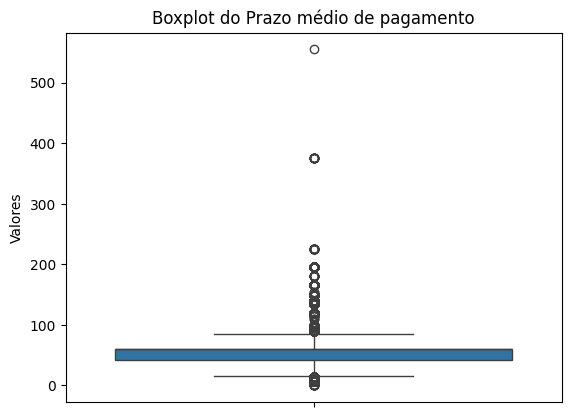

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o boxplot
sns.boxplot(y=base_model['prazo_medio'])
plt.title('Boxplot do Prazo médio de pagamento')
plt.ylabel('Valores')
plt.show()

Podemos observar vários outliers. É bem possível que estes valores mais extremos sejam factíveis, pois de vez em quando o negócio deve ter que lidar com clientes que necessitam de algum crédito especial. Vou permanecer com estes outliers.

Dado que agora temos uma variável numérica ao invés de uma categórica, podemos substituir seus valores faltantes pela sua média. Salvamos com isso mais linhas de serem excluídas:

In [98]:
# Substituindo os valores faltantes pela média
base_model['prazo_medio'].fillna(base_model['prazo_medio'].mean(), inplace=True)

# Retirando a coluna origianl, que agora não é mais útil
base_model = base_model.drop('forma_pagamento', axis=1)

Verificamos a relação entre o prazo médio com o default fazendo um scatterplot. Plotamos também uma curva de uma regressão logística para melhorar a visualização da relação:

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


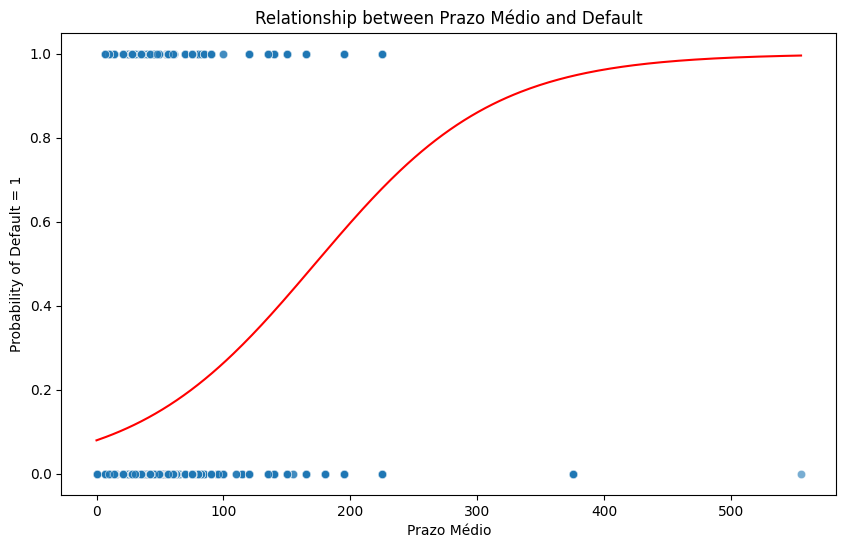

In [99]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Regessão logística
model = LogisticRegression()
model.fit(base_model[['prazo_medio']], base_model['default'])

# Construindo a curva
prazo_medio_values = np.linspace(base_model['prazo_medio'].min(), base_model['prazo_medio'].max(), 300)
default_probs = model.predict_proba(prazo_medio_values.reshape(-1, 1))[:,1]

# Plotando o scatterplot e a curva logística
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prazo_medio', y='default', data=base_model, alpha=0.6)
plt.plot(prazo_medio_values, default_probs, color='red')

plt.title('Relationship between Prazo Médio and Default')
plt.xlabel('Prazo Médio')
plt.ylabel('Probability of Default = 1')
plt.show()

O que primeiro vemos no gráfico é uma curva logística ascendente. Além disso, para prazos de pagamento menores e sem default, é possível ver uma concentração de pontos maior do que com default. Essas constaações podem indicar que prazos maiores aumentam a probabilidade.

Com isso, terminamos a análise e o tratamento das variáveis categóricas. Tiramos então as linhas que possuem os valores faltantes, eliminando 15% das linhas da base. Dado que a quantidade de observações ainda é grande, e também considerando que todas as observações são independentes entre si, não será um fardo tão grande essa eliminação.

In [100]:
base_model = base_model.dropna()

Aproveitamos també para retirar as colunas que não serão úteis para a modelagem e análise. Além das categóricas que foram transformadas, eliminamos também as colunas de mês e ano, pois acredito que a data da compra do produto seja de pouca utilidade para entendermos a inadinplência de quem o comprou:

In [101]:
base_model = base_model.drop(['tipo_sociedade', 'opcao_tributaria', 'month', 'year'], axis=1)

### Análise e Tratamento das outras variáveis

Damos prosseguimento agora para a análise das variáveis numéricas, verificamos a proporção de defaults na base inteira:

In [102]:
# Vendo a proporção de sucesso de default
cont_defalt = base_model['default'].value_counts(normalize=True)
cont_defalt

default
0   0.82
1   0.18
Name: proportion, dtype: float64

Uma substancial discrepância na proporção da nossa variável binária de interesse pode viesar o modelo a prever para uma direção. No caso, ele ficaria inclinado a prever probabilidades menores devido a quantidade menor de defaults na base. Porém, isso era até previsto, pois em um negócio normal é razoável que a maioria dos clientes honre os seus compromissos. Isso indica que a base possa estar representando de forma satisfatória a realidade.

Indo agora para a distribuição das variáveis numéricas (excluindo as dummies e a de prazo médio), fazemos histogramas de cada uma delas para avaliar como que elas se comportam:

array([[<Axes: title={'center': 'dividas_vencidas_qtd'}>,
        <Axes: title={'center': 'falencia_concordata_qtd'}>],
       [<Axes: title={'center': 'valor_total_pedido'}>, <Axes: >]],
      dtype=object)

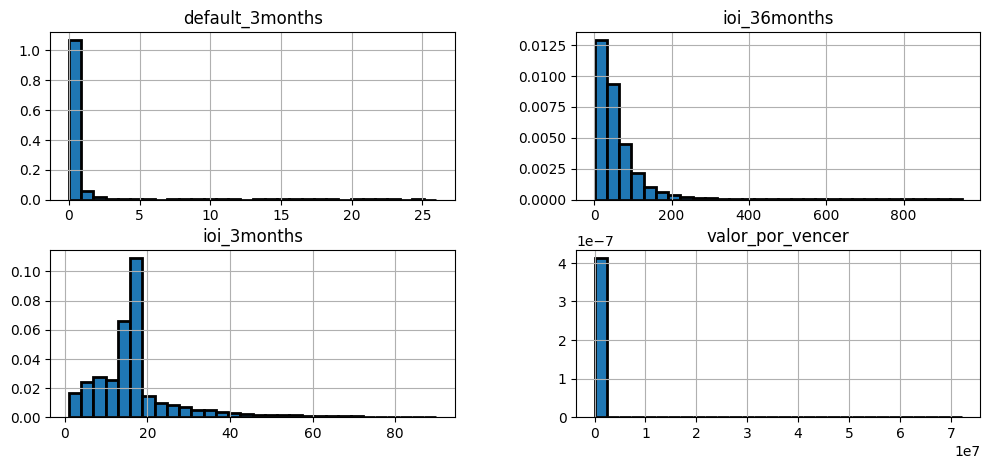

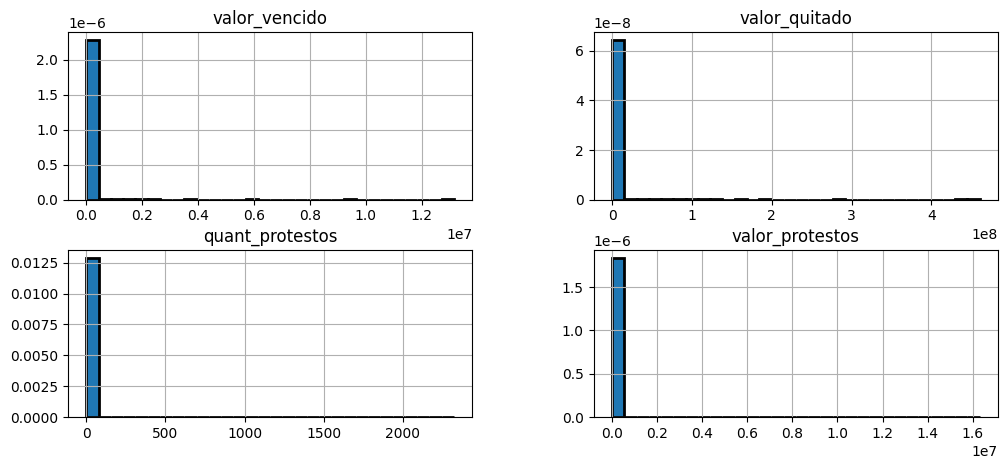

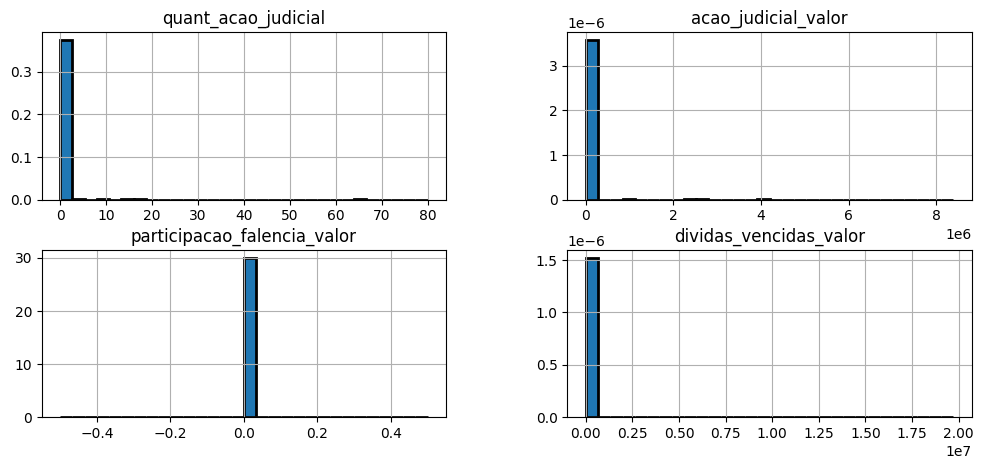

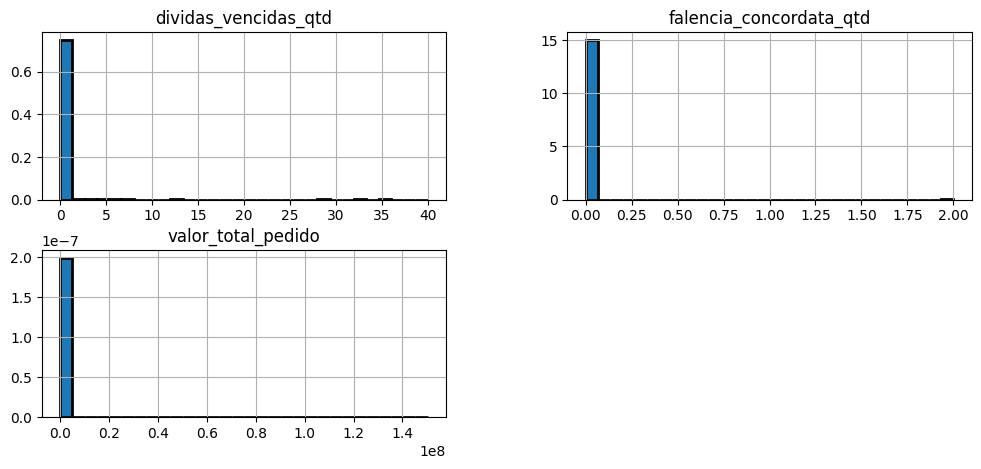

In [103]:
# Plotando histogramas de todas as numéricas
base_model.iloc[:, 0:4].hist(figsize=(12,5), bins=30, edgecolor='black', density=True, linewidth=2)

base_model.iloc[:, 4:8].hist(figsize=(12,5), bins=30, edgecolor='black', density=True, linewidth=2)

base_model.iloc[:, 8:12].hist(figsize=(12,5), bins=30, edgecolor='black', density=True, linewidth=2)

base_model.iloc[:, 12:15].hist(figsize=(12,5), bins=30, edgecolor='black', density=True, linewidth=2)

Observando todos esses gráficos, notamos uma coisa em comum em todos eles: todos eles possuem uma quantidade enorme de outliers!

Isso reforça um pouco o ponto que mencionei anteriormente quando estava anaisando a distribuição do prazo médio de pagamento. De vez em quando, o negócio precisa ceder crédito diferentes do convencional para certos tipos de clientes.

Vamos agora tentar entender a relação entre as variáveis plotando scatterplots:

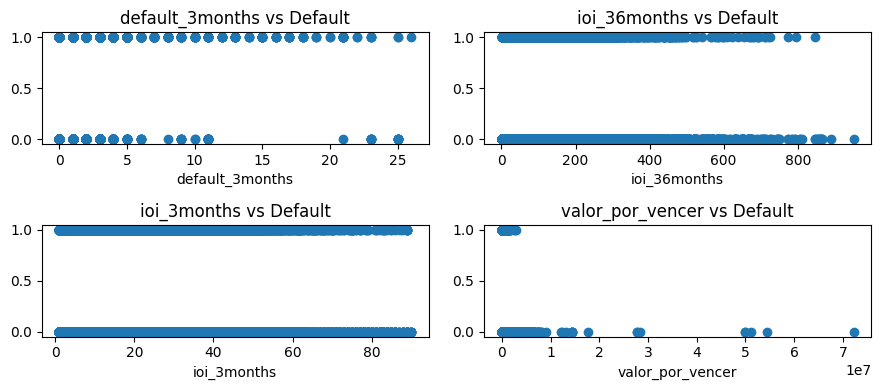

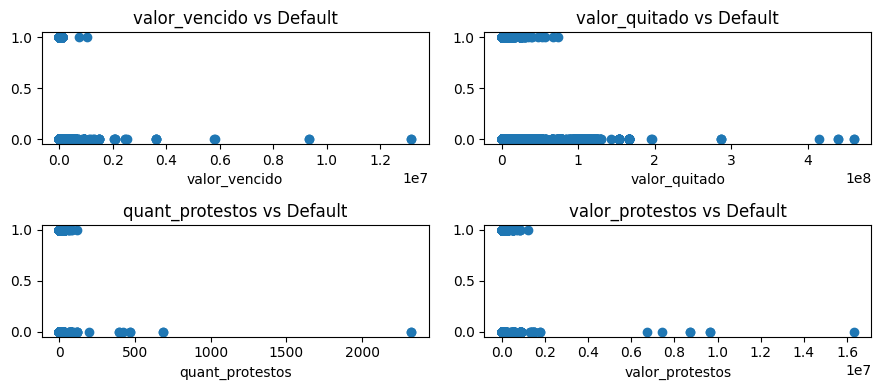

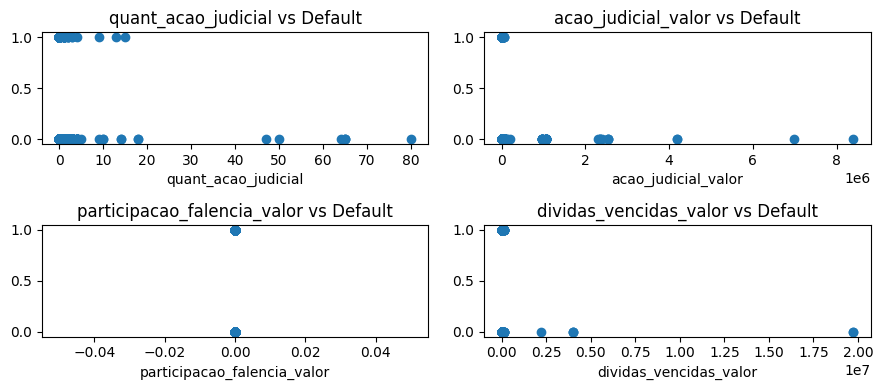

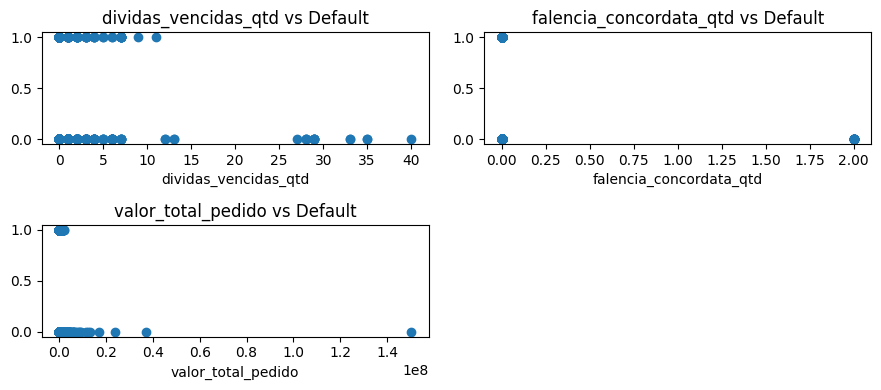

In [104]:
# Separando as variáveis independentes e a dependente
X = base_model.iloc[:, 0:4]  
y = base_model.iloc[:, 15]    

# Configurando o tamanho da figura
plt.figure(figsize=(9, 4))

for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)  
    plt.scatter(X[col], y)       
    plt.title(f'{col} vs Default')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Separando as variáveis independentes e a dependente
X = base_model.iloc[:, 4:8]  
y = base_model.iloc[:, 15]    

# Configurando o tamanho da figura
plt.figure(figsize=(9, 4))

for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)  
    plt.scatter(X[col], y)       
    plt.title(f'{col} vs Default')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Separando as variáveis independentes e a dependente
X = base_model.iloc[:, 8:12]  
y = base_model.iloc[:, 15]    

# Configurando o tamanho da figura
plt.figure(figsize=(9, 4))

for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)  
    plt.scatter(X[col], y)       
    plt.title(f'{col} vs Default')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Separando as variáveis independentes e a dependente
X = base_model.iloc[:, 12:15]  
y = base_model.iloc[:, 15]    

# Configurando o tamanho da figura
plt.figure(figsize=(9, 4))

for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)  
    plt.scatter(X[col], y)       
    plt.title(f'{col} vs Default')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Vemos nos gráficos que não parece haver uma relação entre as variáveis e a chance de inadimplência. Isso nos parece improvável, pois todas as variáveis numéricas, de certa forma, refletem a situação financeira e creditícia do cliente. Podemos conjecturar que a relação entre essas variáveis e o default seja algo não linear, motivando-nos assim a usar algum modelo que tente explorar essa relação. 

## Estimação de modelos e conclusão

O modelo não linear comumente utilizado para prever probabilidades é o de Floresta Aleatória. Junto com ele, usarei também a regressão logística para comparar os resultados com o modelo de Floresta. Como todo procedimento em Machine Learning, separamos a base entre treino e teste para a estimação e validação, respectivamente: 

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

X = base_model.drop('default', axis=1)  # Variáveis independentes
y = base_model['default']               # Variável dependente

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo de regressão logística 
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Criando e treinando o modelo de floresta aleatória 
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Fazendo previsões com o conjunto de teste (probabilidades) usando dados normalizados
y_pred_logistic_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades da classe 1
y_pred_forest_proba = random_forest_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilidades da classe 1

# Calculando o erro quadrático médio para ambos os modelos
mse_logistic = mean_squared_error(y_test, y_pred_logistic_proba)
mse_forest = mean_squared_error(y_test, y_pred_forest_proba)

print(f'Erro Quadrático Médio (Regressão Logística): {mse_logistic}')
print(f'Erro Quadrático Médio (Floresta Aleatória): {mse_forest}')

Erro Quadrático Médio (Regressão Logística): 0.12917759101922682
Erro Quadrático Médio (Floresta Aleatória): 0.08271126888675527


Podemos ver que o modelo de Floresta se saiu melhor do que a regressão logística, indicando que a relação entre as variáveis pode ser mesmo não linear.